In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Contours

### 1.1 Finding and Drawing Contours

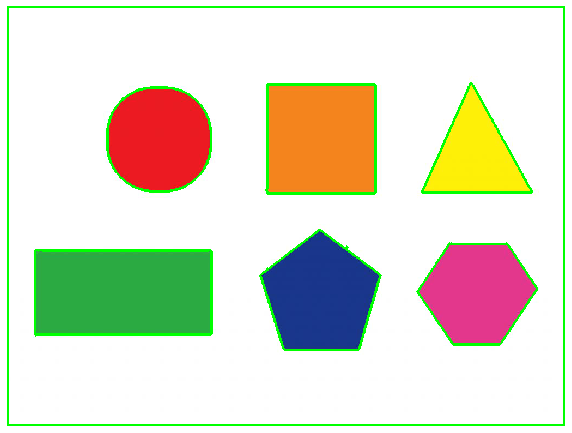

In [21]:
img = cv2.imread('../img/shapes.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,230,255,0)
_ , contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
show_image(np.flip(img, axis =2 ))

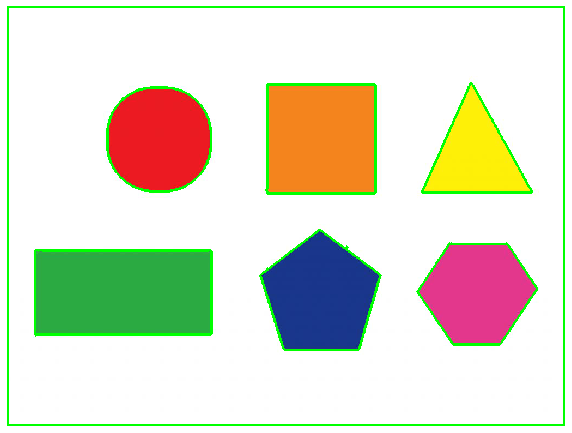

In [22]:
cnt = contours[4]
img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
show_image(np.flip(img, axis =2 ))

### 1.2 Basic Contour Features

#### 1.2.1 Moments

In [35]:
img = cv2.imread('../img/shapes.png', 0)
ret,thresh = cv2.threshold(img,127,255,0)
_, contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[12]
M = cv2.moments(cnt)
print(M)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [36]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

ZeroDivisionError: float division by zero

In [ ]:
# loop over the contours again
for (i, c) in enumerate(cnt):
    # compute the area and the perimeter of the contour
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    clone = img.copy()
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)

#### 1.2.2 Contour Area

In [38]:
area = cv2.contourArea(cnt)
area

0.0

#### 1.2.3 Contour Perimeter

In [39]:
perimeter = cv2.arcLength(cnt,True)
perimeter

0.0

#### 1.2.4 Contour Bounding Boxes

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(img,[box],0,(0,0,255),2)

#### 1.2.5 Contour Minimum Enclosing Circles

In [ ]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

#### 1.2.6 Fitting an Ellipse

In [ ]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)

### EXERCISE: Fit a circle, bounding box and ellipse to objects of an image. What are their properties?

### 1.3 Advanced Contour Features

#### 1.3.1 Aspect Ratio

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

#### 1.3.2 Extent

In [ ]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

#### 1.3.3 Convexity

In [ ]:
k = cv2.isContourConvex(cnt)

#### 1.3.4 Solidity

In [ ]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

### EXERCISE: Use contour properties to identify licence plate in images

### BONUS EXERCISE: Use contour properties to identify shape of objects in images

### 1.4 Contour Hierarchy

In [ ]:
img = cv2.imread('../img/ml.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contour_retrieval_modes = [cv2.RETR_LIST, cv2. RETR_EXTERNAL, cv2.RETR_CCOMP, cv2.RETR_TREE]

In [ ]:
for rm in contour_retrieval_modes:
    contours, hierarchy = cv2.findContours(thresh,rm,cv2.CHAIN_APPROX_SIMPLE)
    print(hierarchy)

### EXERCISE: Find inner contours using hierarchy